<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pre-Process,-Training,-and-Modeling" data-toc-modified-id="Pre-Process,-Training,-and-Modeling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pre-Process, Training, and Modeling</a></span><ul class="toc-item"><li><span><a href="#Pre-processing-of-well-log-analysis" data-toc-modified-id="Pre-processing-of-well-log-analysis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Pre-processing of well log analysis</a></span><ul class="toc-item"><li><span><a href="#Classification" data-toc-modified-id="Classification-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Classification</a></span></li></ul></li></ul></li><li><span><a href="#Pycaret" data-toc-modified-id="Pycaret-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pycaret</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#K-Means-clustering" data-toc-modified-id="K-Means-clustering-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>K-Means clustering</a></span></li><li><span><a href="#Mean-shift" data-toc-modified-id="Mean-shift-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Mean shift</a></span></li><li><span><a href="#Agglomerative-Clustering" data-toc-modified-id="Agglomerative-Clustering-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Agglomerative Clustering</a></span></li><li><span><a href="#Birch-model" data-toc-modified-id="Birch-model-2.0.4"><span class="toc-item-num">2.0.4&nbsp;&nbsp;</span>Birch model</a></span></li></ul></li></ul></li></ul></div>

# Pre-Process, Training, and Modeling

## Pre-processing of well log analysis

Using the notebook with the well log, I interpreted the well logs in an excel sheet (using Ko Ko Rules in petrophysical interpretation), looking at Gamma ray, resistance, and Density and Neutron Porosities. 

In [1]:
!pip install numpy

In [2]:
!pip install pyexcel-xlsx

In [3]:
!pip install xlrd==1.2.0

In [4]:
!pip install XlsxWriter

In [5]:
!pip install xlwings

In [6]:
!pip install xlwt

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [8]:
# Read file
path0 = r'C:\Users\yuvem\OneDrive\Documents\table_well_log.xlsx'
table = pd.read_excel(path0)
table.head()

,well_id,gamma_ray,resistivity,bulk_density,neutron_porosity,neutron_porosity_density_crossover,hydrocarbon_present
0,0,left,right,left,left,yes,yes
1,1,left,left,right,left,yes,yes
2,2,left,right,left,right,no,no
3,3,left,right,left,left,yes,yes
4,4,left,right,left,left,yes,yes


In [9]:
df = table.set_index('well_id')

In [10]:
df.isnull().sum()

gamma_ray                             11
resistivity                            8
bulk_density                          11
neutron_porosity                      11
neutron_porosity_density_crossover    11
hydrocarbon_present                   11
dtype: int64

In [11]:
# Clear nulls
df = df.dropna()
print(df.isnull().sum())
print(len(df))

gamma_ray                             0
resistivity                           0
bulk_density                          0
neutron_porosity                      0
neutron_porosity_density_crossover    0
hydrocarbon_present                   0
dtype: int64
63


In [12]:
df.resistivity.unique()

array(['right', 'left'], dtype=object)

### Classification

In [13]:
# Get x and y parameters
x = df.iloc[: , :-1]
feat =(['gamma_ray','resistivity','bulk_density','neutron_porosity','neutron_porosity_density_crossover'])
y = df.iloc[:,5].values

In [14]:
label_x = LabelEncoder()
x = x.apply(LabelEncoder().fit_transform)

In [15]:
rfc = RandomForestClassifier(max_depth=None,
                             criterion='gini')
print(x,feat)

         gamma_ray   resistivity  bulk_density  neutron_porosity  \
well_id                                                            
0                 1            1             0                 0   
1                 1            0             1                 0   
2                 1            1             0                 1   
3                 1            1             0                 0   
4                 1            1             0                 0   
...             ...          ...           ...               ...   
68                1            1             0                 1   
70                1            0             0                 0   
71                1            1             0                 1   
72                1            0             0                 0   
73                1            1             0                 0   

         neutron_porosity_density_crossover  
well_id                                      
0                      

In [16]:
# Train
rfc.fit(x, y)

RandomForestClassifier()

In [17]:
#prediction
x_in = np.array([1,1,0,0,1])
x_in
y_pred = rfc.predict([x_in])
print("presence of hydrocarbon at this depth=",y_pred)

presence of hydrocarbon at this depth= ['yes']


In [18]:
# Accuracy
rfc.score(x,y)*100

100.0

In [19]:
# Decision Tree classifier
dtc = DecisionTreeClassifier(criterion='gini',max_depth=None,splitter='best')
dtc.fit(x, y)

DecisionTreeClassifier()

In [20]:
# Prediction for Decision Tree Classifier
x_in2 = np.array([1,1,0,0,1])
x_in2 
y_pred2 = dtc.predict([x_in2])
print("presence of hydrocarbon at this depth=",y_pred2)

presence of hydrocarbon at this depth= ['yes']


In [21]:
dtc.score(x, y)*100

100.0

# Pycaret

In [22]:
!pip install pycaret

  Using cached pycaret-2.3.4-py3-none-any.whl (266 kB)
  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)
  Using cached umap_learn-0.5.2-py3-none-any.whl
  Using cached mlflow-1.21.0-py3-none-any.whl (16.9 MB)
  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
  Using cached gensim-3.8.3-cp36-cp36m-win_amd64.whl (24.2 MB)
  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)
  Using cached numba-0.53.1-cp36-cp36m-win_amd64.whl (2.3 MB)
  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached spacy-2.3.7-cp36-cp36m-win_amd64.whl (9.6 MB)
  Using cached plotly-5.3.1-py2.py3-none-any.whl (23.9 MB)
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached ipywidgets-7.6.5-py2.py3-none-any.whl (121 kB)
  Using cached lightgbm-3.3.1-py3-none-win_amd64.whl (1.0 MB)
  Using cached pyod-0.9.5-py3-none-any.whl
  Using cached

In [32]:
from pycaret.clustering import *

In [44]:
s = setup(df, session_id = 123, normalize = True)

,Description,Value
0,session_id,123
1,Original Data,"(63, 6)"
2,Missing Values,False
3,Numeric Features,0
4,Categorical Features,6
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(63, 13)"
9,CPU Jobs,-1


### K-Means clustering

In [45]:
k_model = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6505,52.2895,0.917,0,0,0


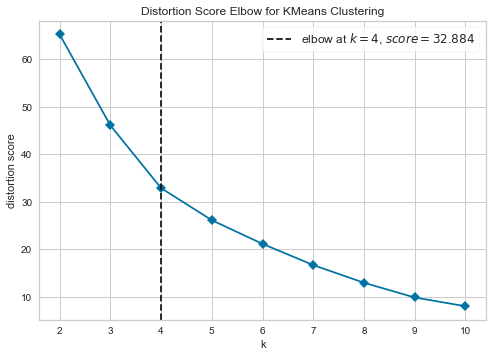

In [47]:
plot_model(k_model, 'elbow')

In [48]:
k_model = create_model('kmeans', num_clusters = 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6505,52.2895,0.917,0,0,0


In [60]:
# Assign labels
kmodel_results = assign_model(k_model)
kmodel_results.head()

,gamma_ray,resistivity,bulk_density,neutron_porosity,neutron_porosity_density_crossover,hydrocarbon_present,Cluster
well_id,,,,,,,
0,left,right,left,left,yes,yes,Cluster 0
1,left,left,right,left,yes,yes,Cluster 0
2,left,right,left,right,no,no,Cluster 1
3,left,right,left,left,yes,yes,Cluster 0
4,left,right,left,left,yes,yes,Cluster 0


In [61]:
# Save model
save_model(k_model, 'kmeans_clustering_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  KMe

In [50]:
plot_model(k_model, 'cluster')

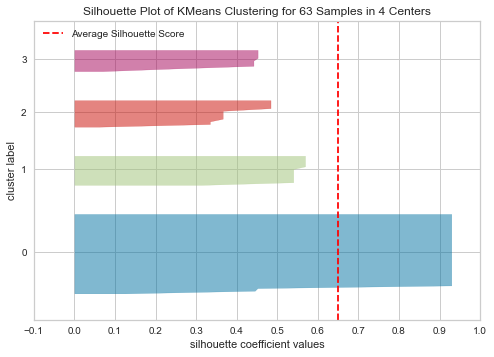

In [76]:
plot_model(k_model, plot = 'silhouette')

In [52]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [68]:
#

### Mean shift

In [63]:
meanshift_model = create_model('meanshift', num_clusters = 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8889,1.0,0.0,0,0,0


### Agglomerative Clustering

In [64]:
hclust_model = create_model('hclust', num_clusters = 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6516,51.4953,0.9457,0,0,0


### Birch model

In [65]:
birch_model = create_model('birch', num_clusters = 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6333,46.8108,0.9575,0,0,0


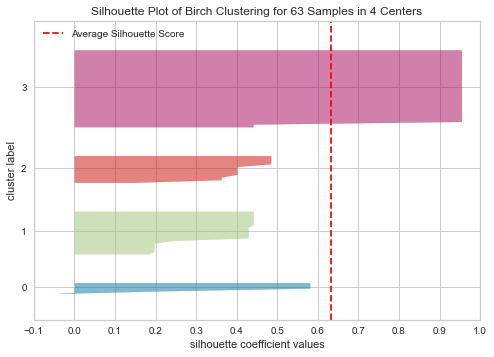

In [73]:
plot_model(birch_model, plot = 'silhouette')

In [66]:
kmodes_model = create_model('kmodes', num_clusters = 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5815,37.4317,1.0927,0,0,0


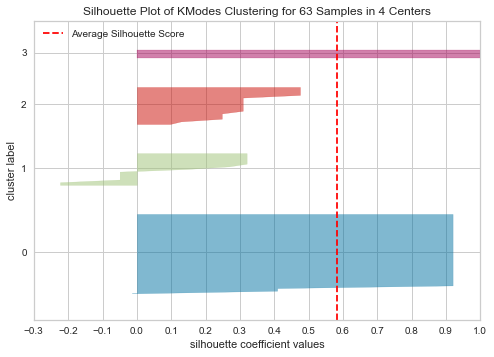

In [74]:
plot_model(kmodes_model, plot = 'silhouette')